# IN-STK5000 - Medical project
#### Group 9: Anette Fredriksen, Adrian Eriksen and Maren Aamodt

## Part 1: Historical data
For part one, we are going to study the historical data set. 

In the dataset we have $x_1$ referring to the gender, 0 or 1.

$x_2$ refers to smoking, and we are assuming that $x_2 = 0$ means the person is a non-smoker, and $x_2=1$ means the person smokes.

The rest of the hisorical dataset is $x_{3:128}$ referring to the gene data, and $x_{129:130}$ referring to the symptoms.

In [48]:
#Importing necessary packages:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [49]:
features = pandas.read_csv('../../data/medical/historical_X.dat', header=None, sep=" ").values
actions = pandas.read_csv('../../data/medical/historical_A.dat', header=None, sep=" ").values
outcome = pandas.read_csv('../../data/medical/historical_Y.dat', header=None, sep=" ").values

In [50]:
observations = features[:, :128]
labels = features[:,128] + features[:,129]*2

In [51]:
df_obs = pandas.DataFrame(observations)
df_obs["symptoms"] = labels
#df_obs.head()

### The distributions of sex and smokers

Firstly, we take a closer look at the two first features, $x_1$, sex, and $x_2$, smoker, and how they are distributed in the historical data.

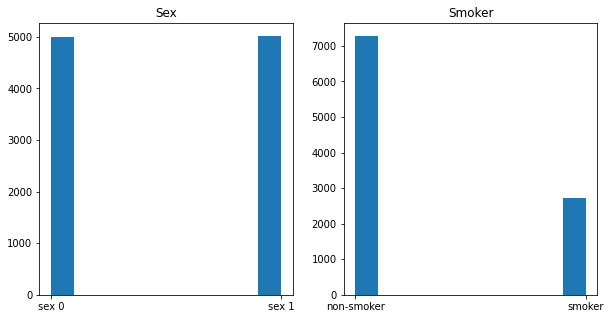

In [52]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].set_xticks([0,1])
axs[0].set_xticklabels(["sex 0", "sex 1"])
axs[0].hist(df_obs[0])
axs[0].set_title("Sex")

axs[1].set_xticks([0,1])
axs[1].set_xticklabels(["non-smoker", "smoker"])
axs[1].hist(df_obs[1])
axs[1].set_title("Smoker")

plt.show()

From the histograms, we can see that the observations seems to be equally distributed when it comes to gender.
Furtheron, we can see that there are far less smokers than non-smokers in the dataset.

Also, it would be interesting to see if there is any differences between the genders when it comes to smoking. Therefore we are plotting histograms of non-smokers and smokers given a certain gender. 

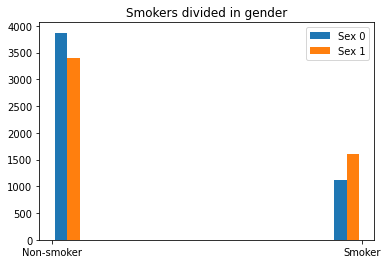

In [53]:
fig, ax = plt.subplots()

ax.hist([df_obs[1][df_obs[0]==0], df_obs[1][df_obs[0]==1]], stacked=False, label=["Sex 0", "Sex 1"])
ax.set_title("Smokers divided in gender")
ax.set(xticks=[0,1], xticklabels=["Non-smoker", "Smoker"])
ax.legend()
plt.show()

Intrestingly, it seems to be fewer smokers among "sex 1".

### Gene distributions
Next, we take a look at the distributions of $x_{3:128}$, e.g. the gene observations. Since all the genes are represented as 0 or 1, which we interpret to meaning absence or presence of gene, it is hard to visualize in a good way. 

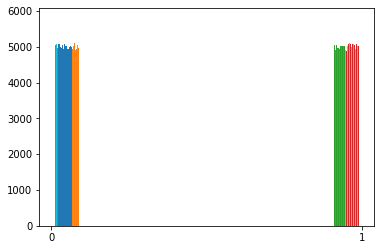

In [54]:
fig, ax = plt.subplots()
ax.hist(observations[:,2:128])
ax.set_xticks([0,1])

plt.show()

The first plot is a histogram of all the 128 genes' value. What we can see, is that the ratio of presence and absence of genes seems to be pretty equal for all genes.

To see the distribution clearer, we "zoom in" to see the sum of observations where a certain gene (from $x_3$ to $x_{128}$) is present (e.g. $x_i=1$). 

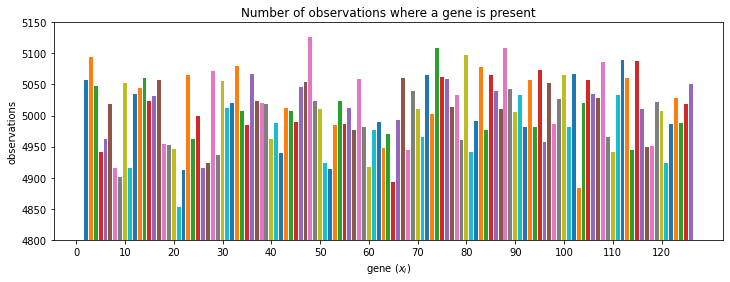

In [55]:
fig, ax = plt.subplots(figsize=(12,4))
for i in range(2,127):
    ax.bar(i, sum(df_obs[i]==1))
    
ax.set_xlabel("gene ($x_i$)")
ax.set_xticks(np.arange(0,128,10))

ax.set_title("Number of observations where a gene is present")
ax.set_ylabel("observations")
ax.set_ybound(4800,5150)
plt.show()

### Clustering with K-means
Using K-means to find clusters in the historical data.

In [56]:
#Finding optimal number of clusters:
elbows_score = np.zeros(21) 

for k in range(1,21):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(observations)

    # Sum of distances of samples to their closest cluster center.
    interia = kmeans_model.inertia_
    
    elbows_score[k] = -kmeans_model.score(observations)/k
    
    #print("k = %2d: Interia = %f   Score = %f   Elbow = %f" % (k,interia,kmeans_model.score(observations), interia/k))

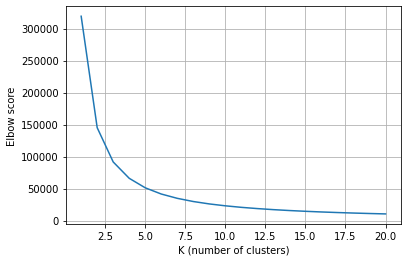

In [57]:
#Plotting the elbow score:
fig, ax = plt.subplots()
ax.plot(range(1,21), elbows_score[1:21])
ax.set_xlabel('K (number of clusters)')
ax.set_ylabel('Elbow score')
ax.grid()
plt.show()

When looking at the elbow score in the plot above, the threshold seems to be at... ??

In [58]:
K = 2
kmeans_model = KMeans(n_clusters=K, random_state=1).fit(df_obs)
df_obs["clusters"] = pandas.DataFrame(kmeans_model.labels_)

for k in range(K):
    print("Nr of observations in cluster %d: %d" %(k,sum(kmeans_model.labels_ == k)))

Nr of observations in cluster 0: 4893
Nr of observations in cluster 1: 5107


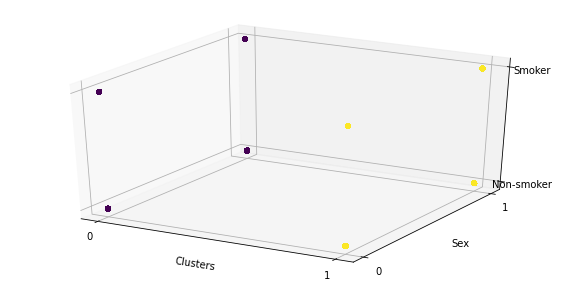

In [59]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(df_obs["clusters"],df_obs[0],df_obs[1], c=df_obs["clusters"])

ax.set_xlabel("Clusters")
ax.set_xticks(range(K))

ax.set_ylabel("Sex")
#ax.set_zlabel("Smoker")

ax.set_yticks([0,1])

ax.set_zticks([0,1])
ax.set_zticklabels(["Non-smoker", "Smoker"])

plt.show()

## The symptoms

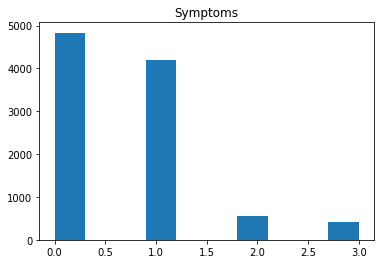

In [60]:
plt.hist(df_obs["symptoms"])
plt.title("Symptoms")
plt.show()


Looking into if there are spesific characteristics that are more common for people with symptoms.

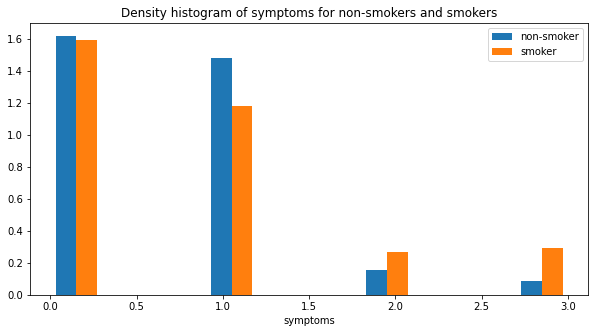

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist([labels[df_obs[1]==0],labels[df_obs[1]==1]], 
        stacked=False,
        label=["non-smoker","smoker"],
        density=True)
ax.legend()
ax.set(title="Density histogram of symptoms for non-smokers and smokers", xlabel="symptoms")
plt.show()

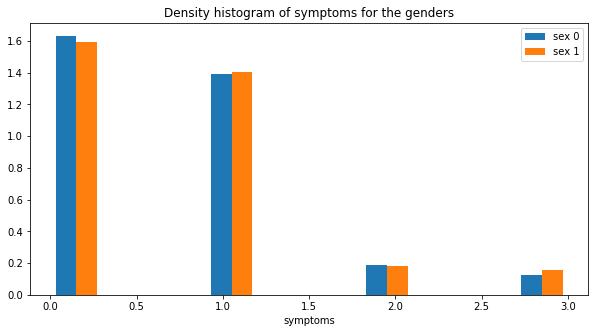

In [62]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist([labels[df_obs[0]==0],labels[df_obs[0]==1]], 
        stacked=False,
        label=["sex 0","sex 1"],
        density=True)
ax.legend()
ax.set(title="Density histogram of symptoms for the genders", xlabel="symptoms")
plt.show()

In [63]:
## (Don't know if this is useful??)
# Grouping the data by symptoms:
df_grouped = df_obs.groupby("symptoms")
df_sympt=[0,0,0,0]
df_sympt[0] = df_grouped.get_group(0)
df_sympt[1] = df_grouped.get_group(1)
df_sympt[2] = df_grouped.get_group(2)
df_sympt[3] = df_grouped.get_group(3)

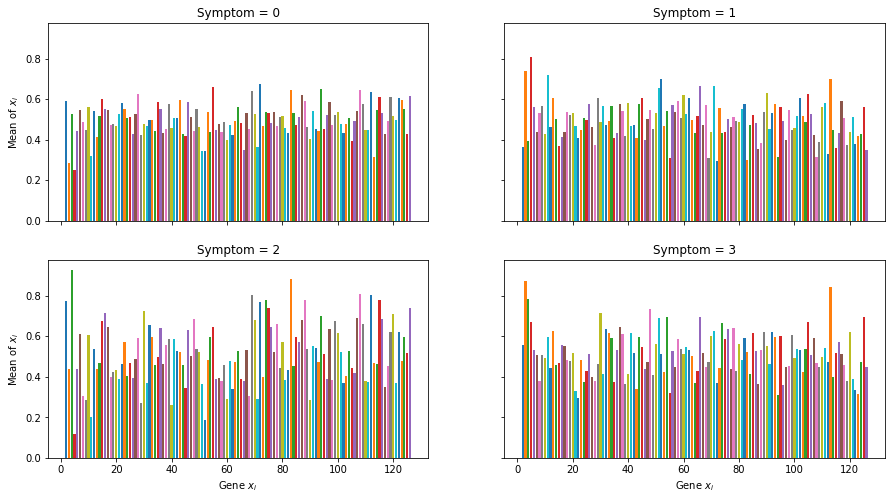

In [64]:
fig, axs = plt.subplots(2,2, figsize=(15,8), sharex=True, sharey=True)

for i in range(2,127):
    axs[0,0].bar(i, np.mean(df_sympt[0][i]))
axs[0,0].set_title("Symptom = 0")
axs[0,0].set_ylabel("Mean of $x_i$")

for i in range(2,127):
    axs[0,1].bar(i, np.mean(df_sympt[1][i]))
axs[0,1].set_title("Symptom = 1")


for i in range(2,127):
    axs[1,0].bar(i, np.mean(df_sympt[2][i]))
axs[1,0].set_title("Symptom = 2")
axs[1,0].set_xlabel("Gene $x_i$")
axs[1,0].set_ylabel("Mean of $x_i$")

for i in range(2,127):
    axs[1,1].bar(i, np.mean(df_sympt[3][i]))
axs[1,1].set_title("Symptom = 3")
axs[1,1].set_xlabel("Gene $x_i$")
plt.show()

It appeares to be some differences in the gene observations for the different symptoms.

### Single-cause or multiple-cause and variable selection

To find wheter a single-casue or multiple-cause metod is best we look at the importance of variables. 
We are using code from https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

We are selecting the best 20 features with univariate selection. If one of the features is much more important than the other features we might want to use a single-cause model with that feature. 
If the dirstibution is more even we sould use multiple features. Since we have a lot of variables (since there is many genes) the model will probablty perform worse having all the features in the model. 

In [65]:
col_names = ["sex", "smoker"] +  [f"gene_{i}" for i in range(1, 127)] 

In [66]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = pd.DataFrame(features[:, :128], )
X.columns = col_names
y = labels
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

        Specs        Score
5      gene_4  1607.259121
3      gene_2  1022.322937
11    gene_10   844.897073
113  gene_112   750.112793
72    gene_71   725.595534
83    gene_82   693.903505
52    gene_51   679.929098
55    gene_54   601.236105
94    gene_93   595.055147
108  gene_107   590.289264
69    gene_68   590.267549
112  gene_111   501.366817
66    gene_65   496.525700
51    gene_50   492.120225
71    gene_70   470.537808
126  gene_125   379.932019
87    gene_86   378.487677
4      gene_3   367.407838
115  gene_114   363.740412
2      gene_1   312.487137


From the feature selection we can se that the genes are more influential than gender and if a person smokes. When printing all the vales we can se that gender has a score of 3.1 and has the third least stronges relationship with symptoms. Smoker has a score of 194.2 and is the 31 most influential variable. It is a big difference in scores for different genes. 

## Measuring the effect of actions  
We assume that result=0 means that the patient is not cured and that result=1 means that the patient is cured. Further, we see from part 2 of the project that action=0 means that the patient has been given a placebo, while action=1 means that the patient has gotten the experimental drug. 

First we made a confusion matrix, to see whether our assumption about the results made sense.  
Result &nbsp; 0 &nbsp; &nbsp; 1  
Action  
0 &nbsp; &nbsp; &nbsp; 7633 &nbsp; 69  
1 &nbsp; &nbsp; &nbsp; 946  &nbsp; 1351  
Looking at the matrix, it seesm likely that the ones put on placebo has a much larger discrepancy between who's treated and who gets well than the ones given a treatment. We'll include a heatmap to make it easier to see.
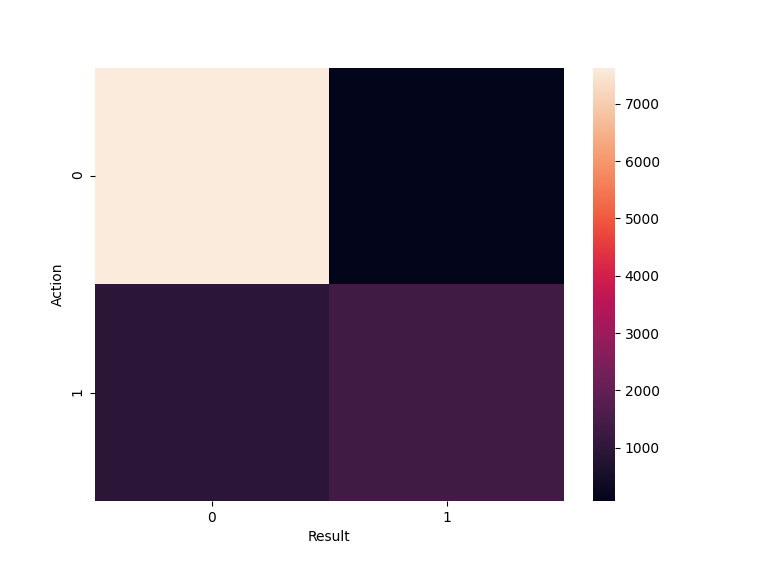
Further, we can look at the percentage of patients cured by trick vs treatment  
Percentage of patients cured with trick: 0.89%  
Percentage of patients cured with treatment: 58.81%  
  
This implies that the experimental drug does work to some extent, as 58% got better from it, while only 0.9% got better without. However, it should be taken into consideration that less than 25% of the patients got treated with the experimental drug. Hence, we should look into what the 69 people that got well by themselves have in common with the 1351 that got better from the medicine. Another interesting point will be to look at what the 946 that didn't get cured by the medication have in common, to see whether we can deduct any implication as to who the drug is most effective on.

## Part 2: Improved Policies
### Exercise 1.1
The utility of the historical data is 0.11912
### Exercise 1.2
To find the error bounds on the expected utility, we'll use bootstrapping and look at the 95% confidence interval.  
We first create 1000 datasets by sampling from the original data, then calculate the expected utility for each dataset using policy.estimate_utility().  
Looking at the 2.5 and 97.5 percentile from the resulting datasets, we get \[0.113, 0.125\]. The utility we got from the historical data of 0.11912 is then within the 95% confidence interval.
### Exercise